In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
day_0 = pd.read_csv("prices_round_2_day_-1.csv", sep=";") # day -1
day_1 = pd.read_csv("prices_round_2_day_0.csv", sep=";")
day_2 = pd.read_csv("prices_round_2_day_1.csv", sep=";")

all_days = pd.concat([day_0,day_1,day_2], ignore_index=True)
print(all_days.info)
print(all_days.head())

<bound method DataFrame.info of        timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1200.00             1.5           10.5           -2.0   
1            100  1201.75             1.5            9.5           -2.0   
2            200  1201.75             1.5            9.5           -2.0   
3            300  1201.75             1.5            9.5           -2.0   
4            400  1201.75             1.5            9.5           -2.0   
...          ...      ...             ...            ...            ...   
29998     999600  1036.25             0.9            9.5           -5.0   
29999     999700  1036.25             0.9            9.5           -5.0   
30000     999800  1036.25             0.9            9.5           -5.0   
30001     999900  1034.25             0.9            9.5           -5.0   
30002    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT  HUMIDITY  DAY  
0      2500.0000  79.00000   -1  

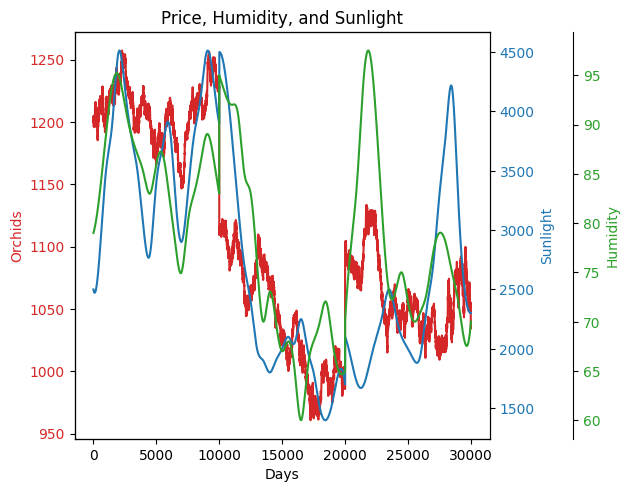

In [19]:
fig, ax1 = plt.subplots()

# Plot "ORCHIDS" on the first y-axis.
color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Orchids', color=color)
ax1.plot(all_days.index, all_days['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for "SUNLIGHT".
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sunlight', color=color)
ax2.plot(all_days.index, all_days['SUNLIGHT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for "HUMIDITY".
ax3 = ax1.twinx()
color = 'tab:green'
# Offset the right spine of ax3. The ticks and label have already been set above.
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right.
ax3.set_ylabel('Humidity', color=color)
ax3.plot(all_days.index, all_days['HUMIDITY'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Adjust layout to prevent overlap
plt.title("Price, Humidity, and Sunlight")
plt.show()

In [20]:

humidity = all_days.get(['timestamp','ORCHIDS', 'HUMIDITY']).fillna(0)
humidity['SMA_30'] = humidity['HUMIDITY'].rolling(30).mean().fillna(0) # simple moving average
humidity['Pct_Change'] = humidity['HUMIDITY'].pct_change().fillna(0)
humidity['EMA_30'] = humidity['HUMIDITY'].ewm(span=30, adjust=False).mean().fillna(0)
humidity['STD_30'] = humidity['HUMIDITY'].rolling(30).std().fillna(0)
humidity['Pct_Change_Stdev'] = humidity['Pct_Change'].rolling(30).std().fillna(0)
print(humidity.head())
print(humidity[100:120])

   timestamp  ORCHIDS  HUMIDITY  SMA_30  Pct_Change     EMA_30  STD_30  \
0          0  1200.00  79.00000     0.0    0.000000  79.000000     0.0   
1        100  1201.75  79.00410     0.0    0.000052  79.000265     0.0   
2        200  1201.75  79.00821     0.0    0.000052  79.000777     0.0   
3        300  1201.75  79.01234     0.0    0.000052  79.001523     0.0   
4        400  1201.75  79.01649     0.0    0.000053  79.002489     0.0   

   Pct_Change_Stdev  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
     timestamp  ORCHIDS   HUMIDITY     SMA_30  Pct_Change     EMA_30  \
100      10000  1198.75  79.502014  79.418673    0.000074  79.420082   
101      10100  1198.25  79.507940  79.424347    0.000075  79.425750   
102      10200  1198.50  79.513885  79.430039    0.000075  79.431436   
103      10300  1199.75  79.519844  79.435748    0.000075  79.437140   
104      10400  1200.75  79.525826  79.441476    0.000075  79.4

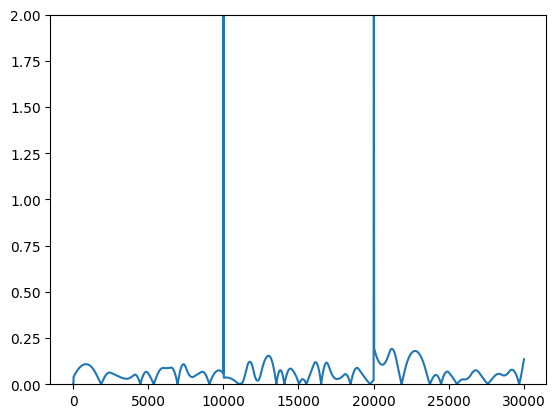

In [15]:
plt.plot(humidity['STD_30'])
plt.ylim([0,2])
plt.show()

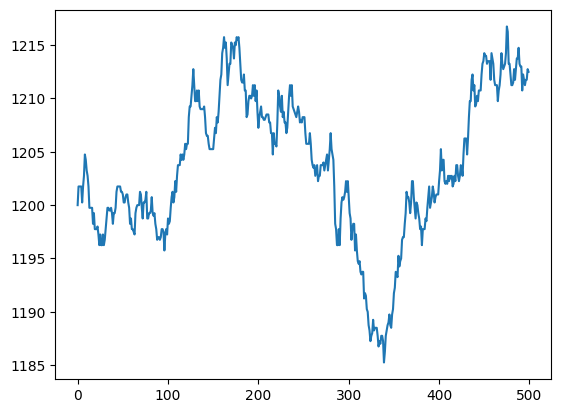

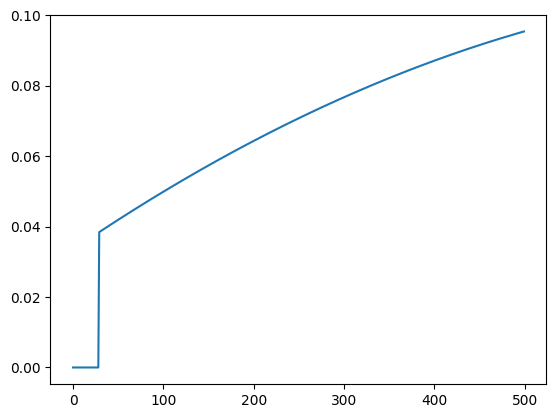

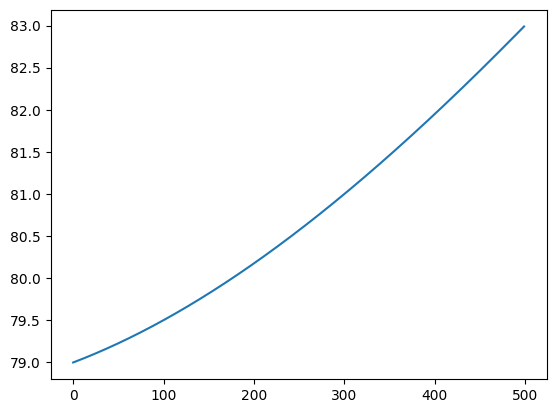

In [24]:
plt.plot(all_days['ORCHIDS'][:500])
plt.show()
plt.plot(humidity['STD_30'][:500])
plt.show()
plt.plot(humidity['HUMIDITY'][:500])
plt.show()

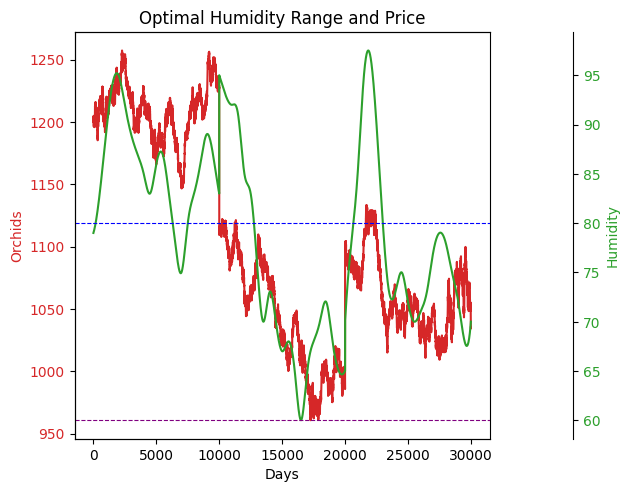

In [18]:
# plot humidity and price with horizontal lines for when humidity is above 80 or below 60
fig, ax1 = plt.subplots()

# Plot "ORCHIDS" on the first y-axis.
color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Orchids', color=color)
ax1.plot(all_days.index, all_days['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for "HUMIDITY".
ax2 = ax1.twinx()
color = 'tab:green'
# Offset the right spine of ax3. The ticks and label have already been set above.
ax2.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right.
ax2.set_ylabel('Humidity', color=color)
ax2.plot(all_days.index, all_days['HUMIDITY'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add horizontal lines for specific humidity levels
ax2.axhline(80, color='blue', linewidth=0.8, linestyle='--')  # Horizontal line at humidity 80
ax2.axhline(60, color='purple', linewidth=0.8, linestyle='--') # Horizontal line at humidity 60

fig.tight_layout()  # Adjust layout to prevent overlap
plt.title("Optimal Humidity Range and Price")
plt.show()